# Video Game Sales Exploratory Data Analysis

## Import necessary librairies and the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
#import the dataframe
sales_df = pd.read_csv('./video_games_sales.csv')

## Data cleaning and preparation

### Get to know the data

In [4]:
sales_df.shape

(16719, 16)

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Looking for irrelevant and unwanted informations

In [7]:
#Are there duplicates ?
sales_df[sales_df[['Name', 'Platform', 'Year_of_Release']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.22,0.00,0.23,2.56,83.0,22.0,5.5,101.0,EA Tiburon,E
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
16233,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


In [87]:
#Drop duplicates
sales_df = sales_df.drop([14246, 16233])

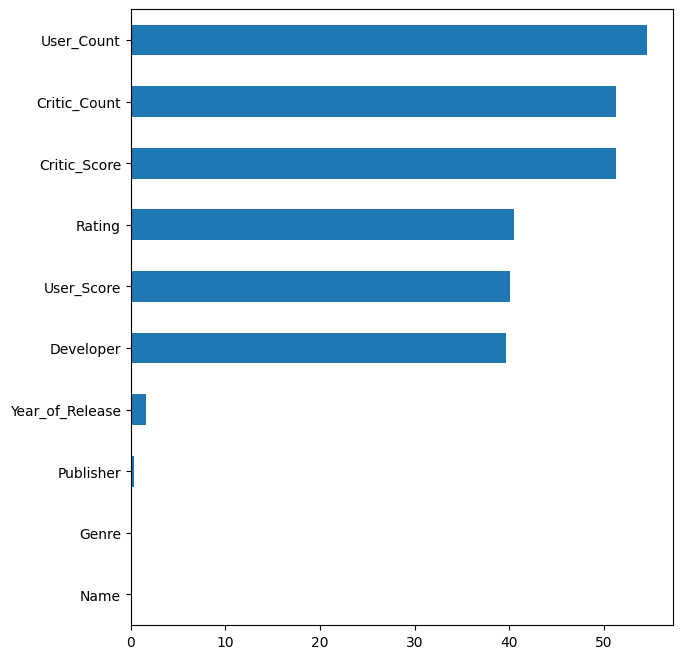

In [9]:
#Find most features with missing values
missing_percentages = (sales_df.isna().sum().sort_values(ascending=True) *100)/sales_df.shape[0]
plt.figure(figsize=(7,8))
missing_percentages[missing_percentages != 0].plot(kind='barh');

In [88]:
# Drop features with 40%+ missing values
sales_df = sales_df.drop(
    columns=['User_Score', 'User_Count', 'Developer', 'Rating',
             'Critic_Score', 'Critic_Count'])

In [11]:
sales_df[sales_df['Name'].isna()]

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
659,NaN,GEN,NaN,Acclaim Entertainment,1.78,0.53,0.0,0.08,2.39


In [89]:
sales_df = sales_df.drop([659])

In [90]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16716 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16716 non-null  object 
 1   Platform         16716 non-null  object 
 2   Year_of_Release  16447 non-null  float64
 3   Genre            16716 non-null  object 
 4   Publisher        16662 non-null  object 
 5   NA_Sales         16716 non-null  float64
 6   EU_Sales         16716 non-null  float64
 7   JP_Sales         16716 non-null  float64
 8   Other_Sales      16716 non-null  float64
 9   Global_Sales     16716 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


For the 'year of release' feature, we had 3 choices :

- fill the missing values by searching on the internet
- drop the rows with the missing values
- drop the entire column.
    
Since we won't use it that much further in this project, I decided to drop it.

In [14]:
sales_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [15]:
sales_df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [94]:
sales_df['Year_of_Release'].astype(object)

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16714    2016.0
16715    2006.0
16716    2016.0
16717    2003.0
16718    2016.0
Name: Year_of_Release, Length: 16716, dtype: object

In [95]:
sales_df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

## Data exploration

In [91]:
sales_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16447.000000,16716.000000,16716.000000,16716.000000,16716.000000,16716.000000
mean,2006.488661,0.263271,0.145019,0.077614,0.047335,0.533493
std,5.877492,0.813497,0.503317,0.308844,0.186726,1.547997
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000


<Axes: >

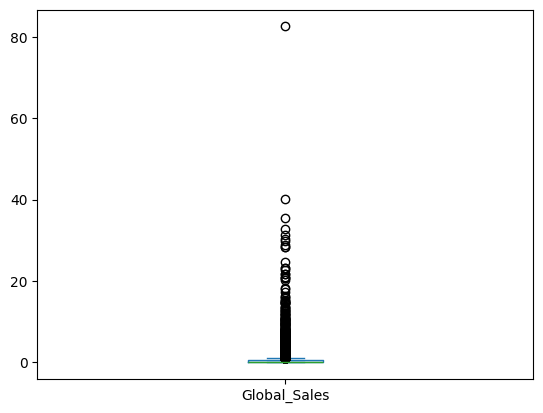

In [17]:
sales_df['Global_Sales'].plot(
    kind='box'
)

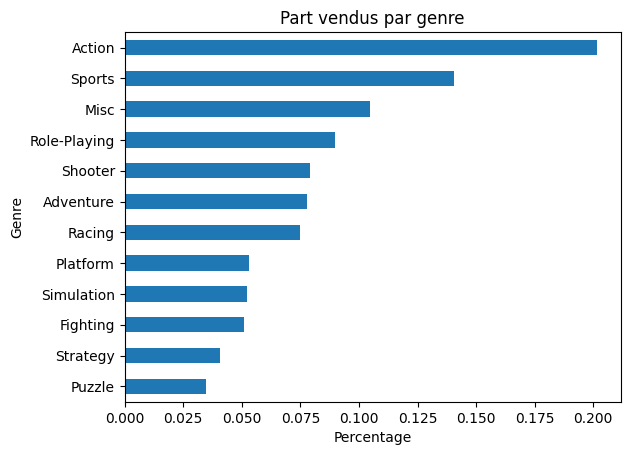

In [18]:
sales_df['Genre'].value_counts(normalize=True).sort_values().plot(
    kind='barh', 
    title='Part vendus par genre', 
    xlabel= 'Percentage'
    );

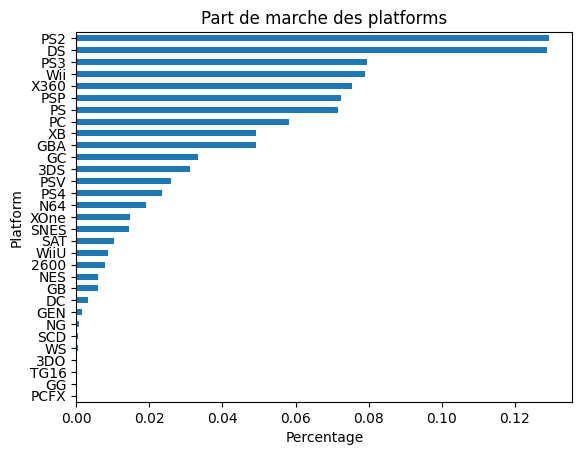

In [19]:
sales_df['Platform'].value_counts(normalize=True).sort_values().plot(
    kind='barh', 
    title='Part de marche des platforms', 
    xlabel='Percentage'
    );

## Answering research questions

### 1- Top selling games

- Which games have the highest global sales ?

In [20]:
top10glob = sales_df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top10glob

Name
Wii Sports                        82.53
Grand Theft Auto V                56.57
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Black Ops           30.82
Call of Duty: Modern Warfare 3    30.59
New Super Mario Bros.             29.80
Name: Global_Sales, dtype: float64

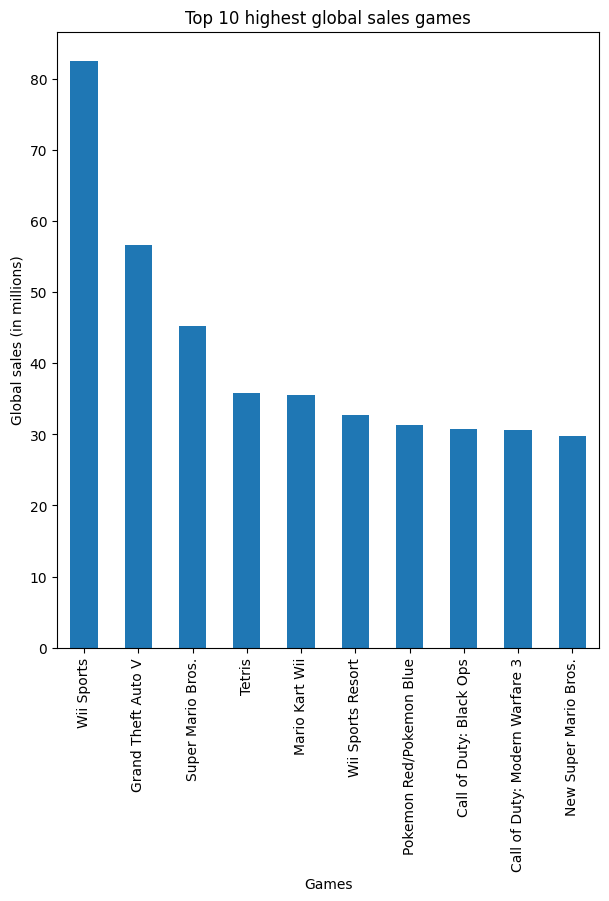

In [21]:
plt.figure(figsize=(7,8))
top10glob.plot(kind='bar',
               title='Top 10 highest global sales games',
               xlabel='Games',
               ylabel='Global sales (in millions)'
               );

- How do the top-selling games differ by region ?

In [22]:
# In North America
top10NA = sales_df.groupby('Name')['NA_Sales'].sum().sort_values(ascending=False).head(10)
top10NA

Name
Wii Sports                        41.36
Super Mario Bros.                 32.48
Duck Hunt                         26.93
Tetris                            26.17
Grand Theft Auto V                23.84
Call of Duty: Black Ops           17.57
Super Mario World                 15.99
Mario Kart Wii                    15.68
Wii Sports Resort                 15.61
Call of Duty: Modern Warfare 3    15.54
Name: NA_Sales, dtype: float64

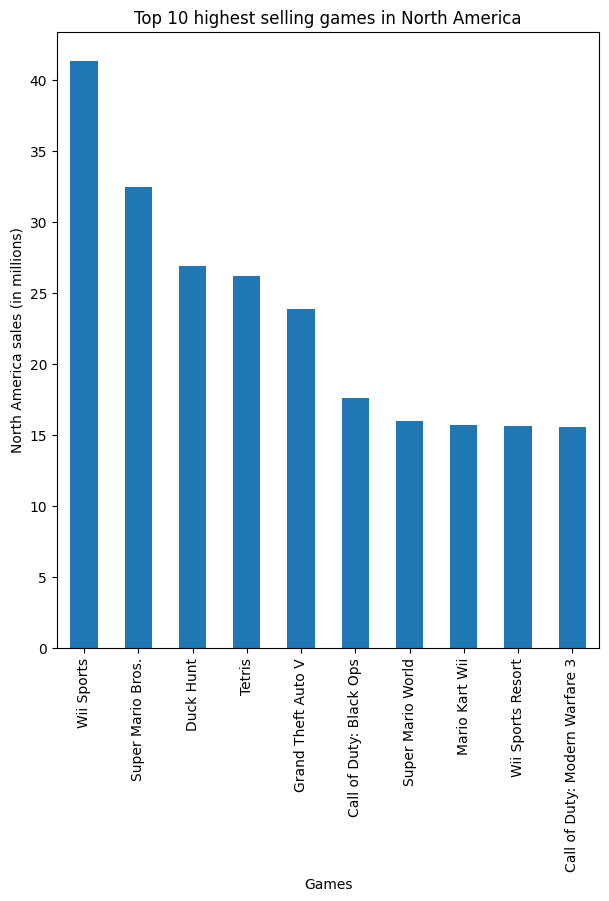

In [23]:
plt.figure(figsize=(7,8))
top10NA.plot(kind='bar',
               title='Top 10 highest selling games in North America',
               xlabel='Games',
               ylabel='North America sales (in millions)'
               );

In [24]:
# In Europa
top10EU = sales_df.groupby('Name')['EU_Sales'].sum().sort_values(ascending=False).head(10)
top10EU

Name
Wii Sports                        28.96
Grand Theft Auto V                23.42
Mario Kart Wii                    12.76
FIFA 15                           12.02
Call of Duty: Modern Warfare 3    11.15
FIFA 16                           11.09
FIFA 14                           10.96
Nintendogs                        10.95
Wii Sports Resort                 10.93
Call of Duty: Black Ops II        10.84
Name: EU_Sales, dtype: float64

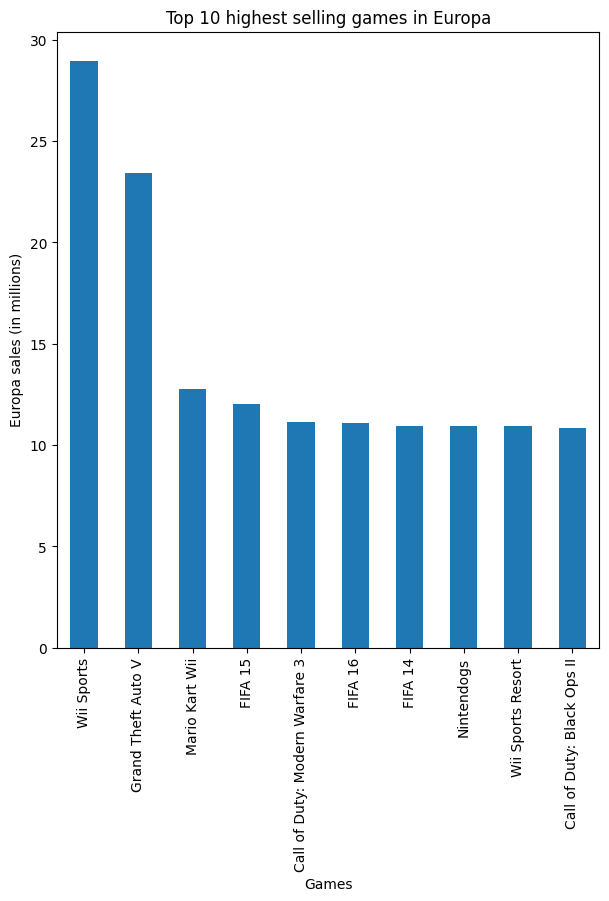

In [25]:
plt.figure(figsize=(7,8))
top10EU.plot(kind='bar',
               title='Top 10 highest selling games in Europa',
               xlabel='Games',
               ylabel='Europa sales (in millions)'
               );

In [26]:
# In Japan
top10JP = sales_df.groupby('Name')['JP_Sales'].sum().sort_values(ascending=False).head(10)
top10JP

Name
Pokemon Red/Pokemon Blue              10.22
Pokemon Gold/Pokemon Silver            7.20
Super Mario Bros.                      6.96
New Super Mario Bros.                  6.50
Pokemon Diamond/Pokemon Pearl          6.04
Tetris                                 6.03
Pokemon Black/Pokemon White            5.65
Dragon Quest VII: Warriors of Eden     5.40
Pokemon Ruby/Pokemon Sapphire          5.38
Animal Crossing: Wild World            5.33
Name: JP_Sales, dtype: float64

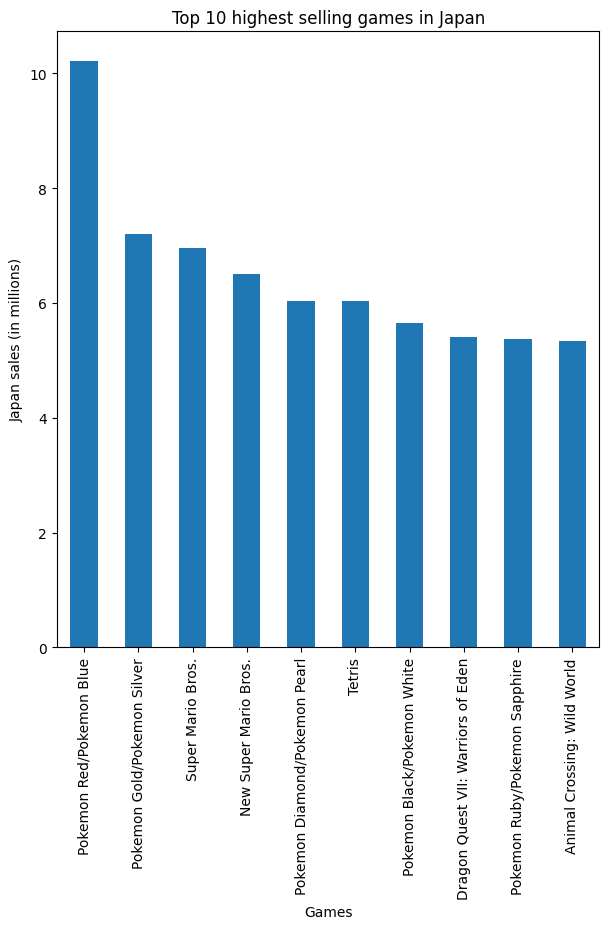

In [27]:
plt.figure(figsize=(7,8))
top10JP.plot(kind='bar',
               title='Top 10 highest selling games in Japan',
               xlabel='Games',
               ylabel='Japan sales (in millions)'
               );

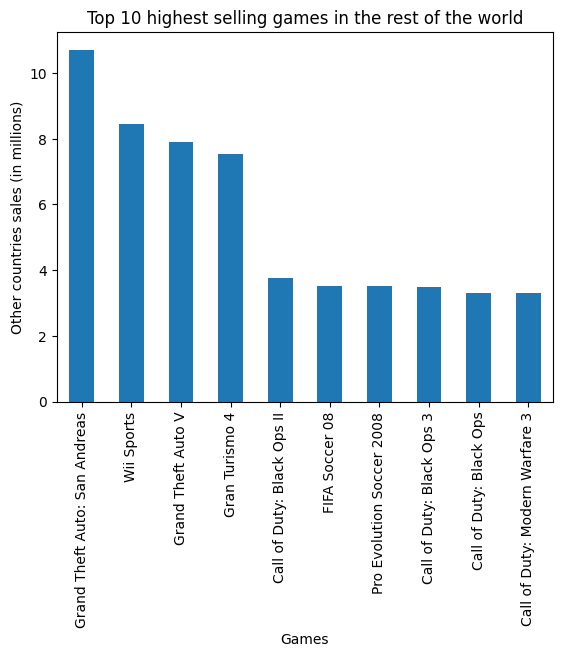

In [28]:
# In the rest of the world
sales_df.groupby('Name')['Other_Sales'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar',
    title='Top 10 highest selling games in the rest of the world',
    xlabel='Games',
    ylabel='Other countries sales (in millions)'
               );

### 2- Platform Analysis

- Which platforms have the highest total sales globally ?

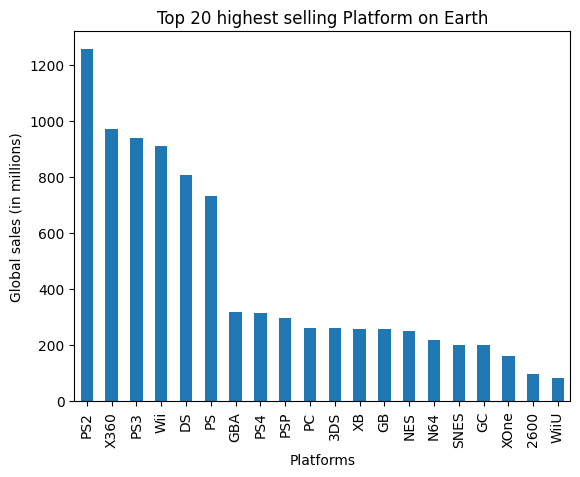

In [29]:
sales_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(20).plot(
    kind='bar',
    title='Top 20 highest selling Platform on Earth',
    ylabel= 'Global sales (in millions)',
    xlabel='Platforms'
);

- How do sells differ  across platforms in different regions ?

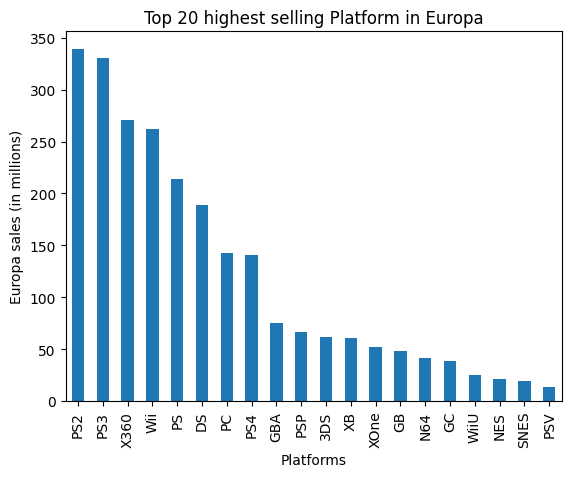

In [30]:
# In Europa
sales_df.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False).head(20).plot(
    kind='bar',
    title='Top 20 highest selling Platform in Europa',
    ylabel= 'Europa sales (in millions)',
    xlabel='Platforms'
);

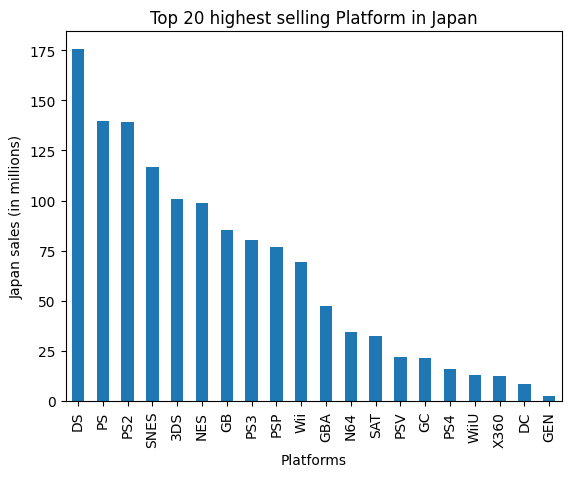

In [31]:
#In Japan
sales_df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False).head(20).plot(
    kind='bar',
    title='Top 20 highest selling Platform in Japan',
    ylabel= 'Japan sales (in millions)',
    xlabel='Platforms'
);

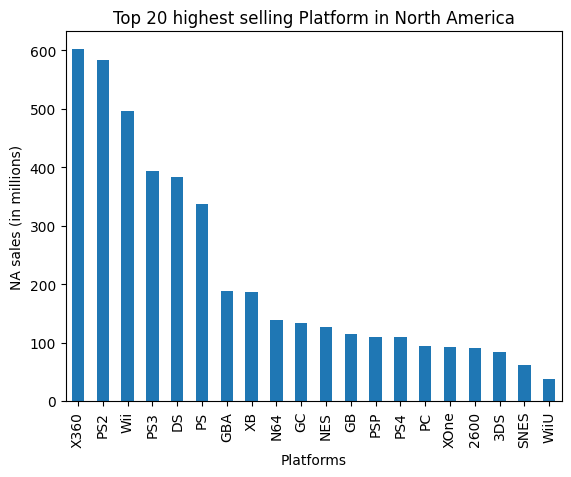

In [32]:
#In North America
sales_df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False).head(20).plot(
    kind='bar',
    title='Top 20 highest selling Platform in North America',
    ylabel= 'NA sales (in millions)',
    xlabel='Platforms'
);

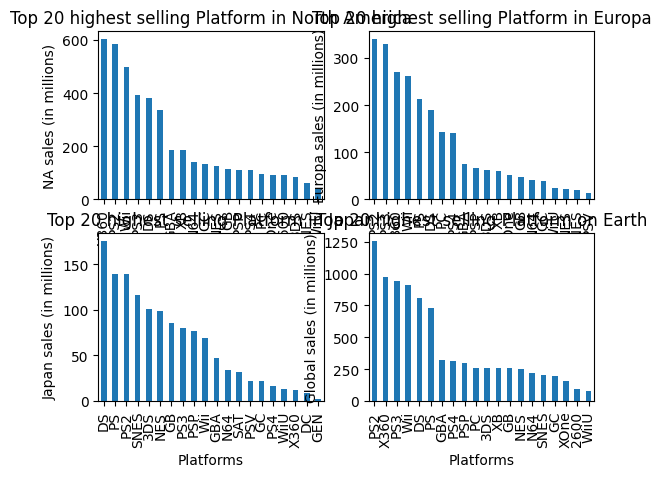

In [33]:
#fig = plt.figure(figsize=(20,21))
fig, axes = plt.subplots(2,2)
sales_df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False).head(20).plot(
    kind='bar',
    title='Top 20 highest selling Platform in North America',
    ylabel= 'NA sales (in millions)',
    xlabel='Platforms',
    ax=axes[0, 0]
);

sales_df.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False).head(20).plot(
    kind='bar',
    title='Top 20 highest selling Platform in Europa',
    ylabel= 'Europa sales (in millions)',
    xlabel='Platforms',
    ax=axes[0, 1]
);

sales_df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False).head(20).plot(
    kind='bar',
    title='Top 20 highest selling Platform in Japan',
    ylabel= 'Japan sales (in millions)',
    xlabel='Platforms',
    ax=axes[1, 0]
);

sales_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(20).plot(
    kind='bar',
    title='Top 20 highest selling Platform on Earth',
    ylabel= 'Global sales (in millions)',
    xlabel='Platforms',
    ax=axes[1, 1]
);

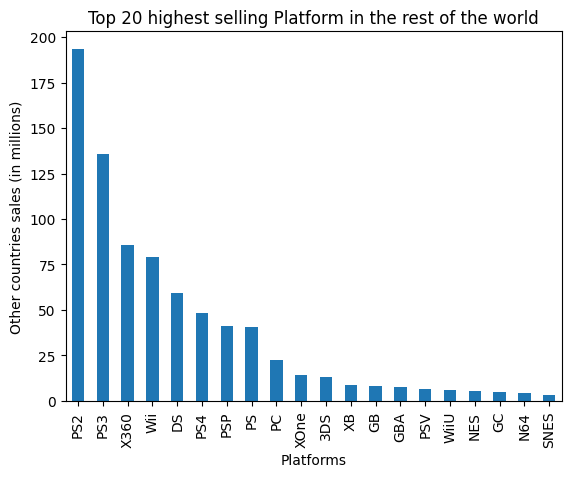

In [34]:
#In the rest of the world
sales_df.groupby('Platform')['Other_Sales'].sum().sort_values(ascending=False).head(20).plot(
    kind='bar',
    title='Top 20 highest selling Platform in the rest of the world',
    ylabel= 'Other countries sales (in millions)',
    xlabel='Platforms'
);

### 3- Genre Trends

- Which genres are the most present on the market ?

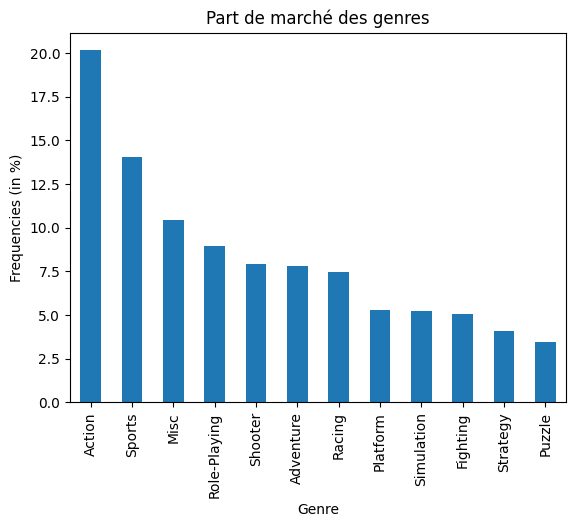

In [35]:
(sales_df['Genre'].value_counts(normalize=True)*100).plot(
    kind='bar',
    ylabel='Frequencies (in %)',
    title='Part de marché des genres'
);

- What genres are the most sold globally ?

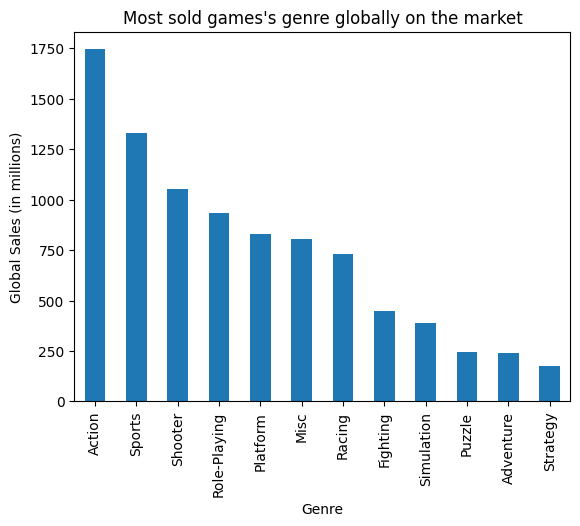

In [36]:
sales_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).plot(
    kind='bar',
    title="Most sold games's genre globally on the market",
    ylabel='Global Sales (in millions)'
);

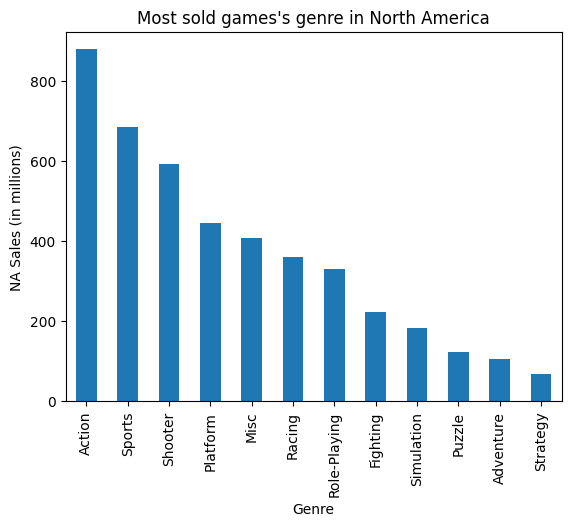

In [37]:
#In North America
sales_df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).plot(
    kind='bar',
    title="Most sold games's genre in North America",
    ylabel='NA Sales (in millions)'
);

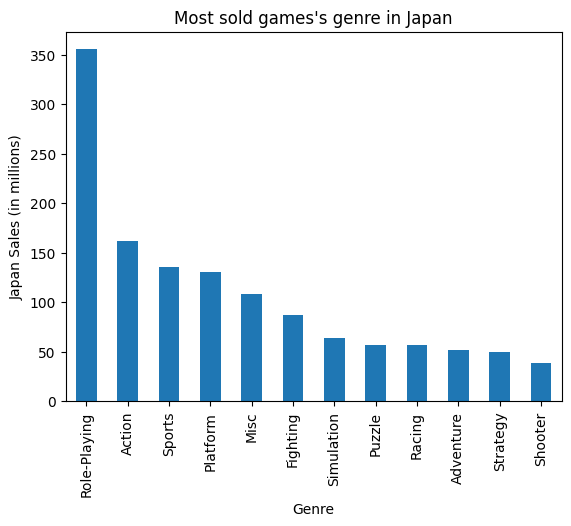

In [38]:
# In Japan
sales_df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False).plot(
    kind='bar',
    title="Most sold games's genre in Japan",
    ylabel='Japan Sales (in millions)'
);

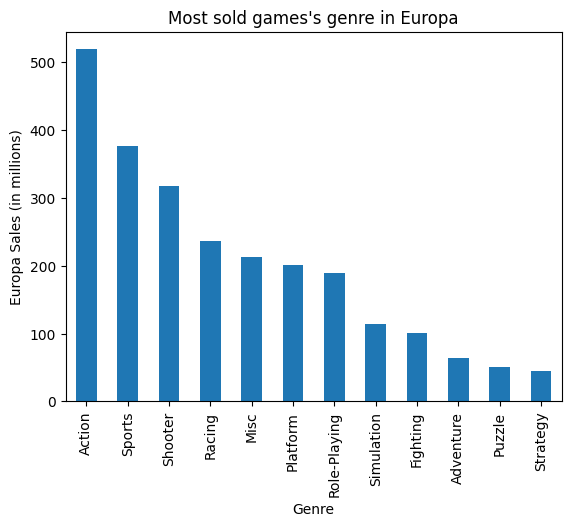

In [39]:
#In Europa
sales_df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False).plot(
    kind='bar',
    title="Most sold games's genre in Europa",
    ylabel='Europa Sales (in millions)'
);

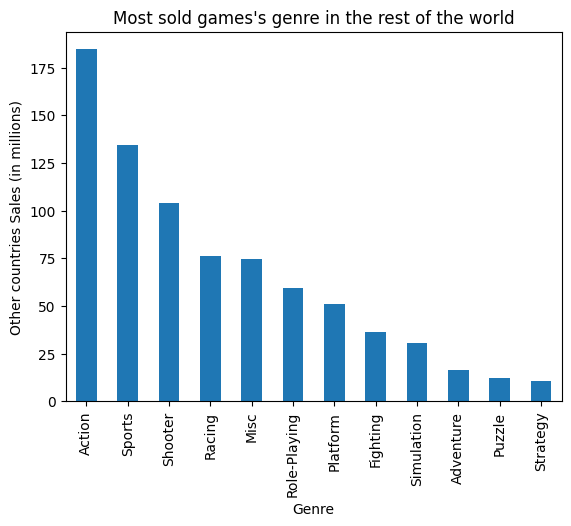

In [40]:
#In the rest of the world
sales_df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False).plot(
    kind='bar',
    title="Most sold games's genre in the rest of the world",
    ylabel='Other countries Sales (in millions)'
);

### 4- Plubisher Performance

- Which publishers have the highest total sales ?

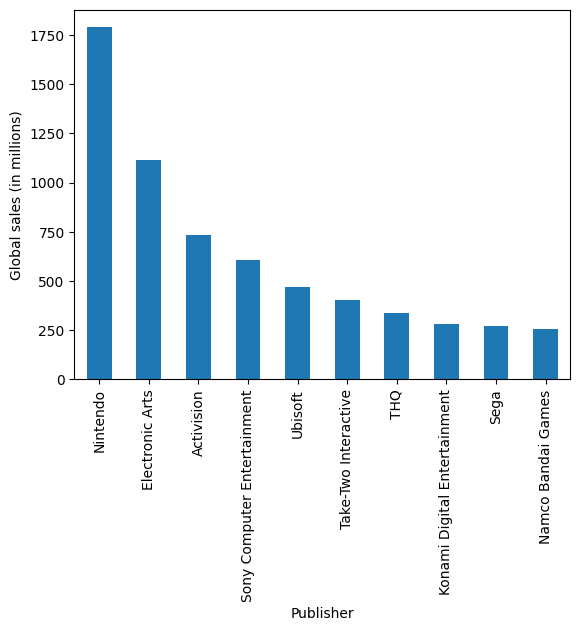

In [99]:
sales_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar',
    ylabel="Global sales (in millions)"
);

### 5- How do sales trends differ between region by year ?

In [106]:
# Calculate summary statistics
summary_stats = sales_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
           NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16716.000000  16716.000000  16716.000000  16716.000000  16716.000000
mean       0.263271      0.145019      0.077614      0.047335      0.533493
std        0.813497      0.503317      0.308844      0.186726      1.547997
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.030000      0.470000
max       41.360000     28.960000     10.220000     10.570000     82.530000


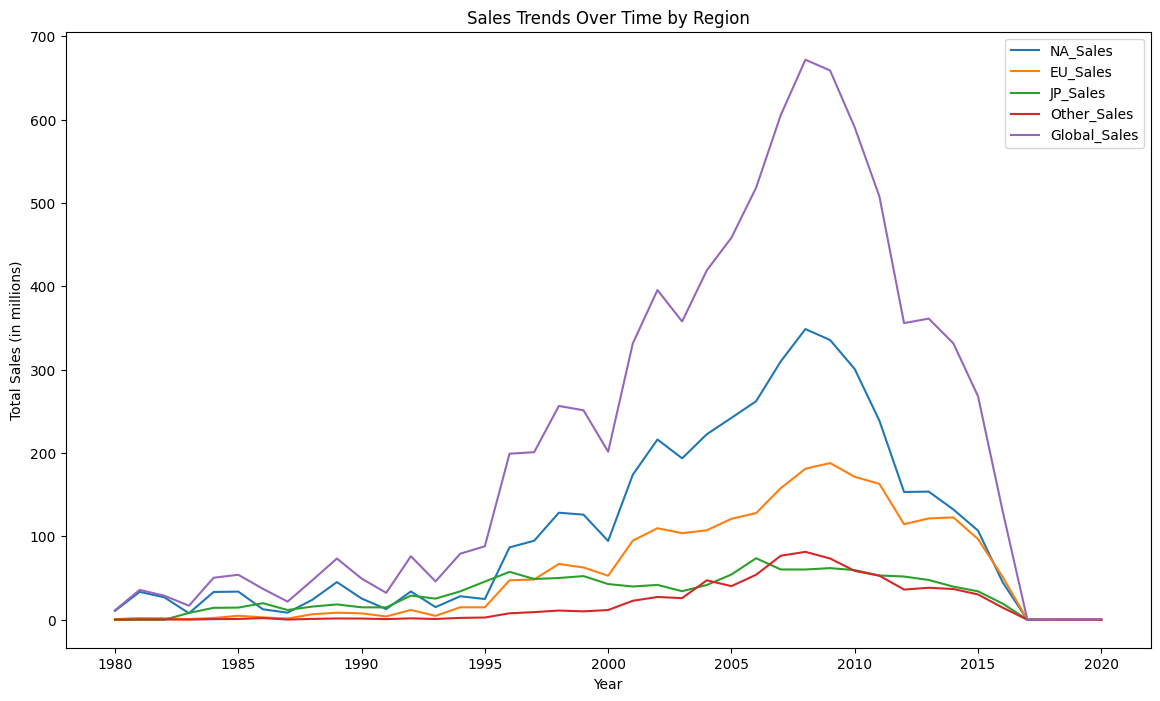

In [102]:
# Plot sales over time for each region
plt.figure(figsize=(14, 8))
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
    sales_by_year = sales_df.groupby('Year_of_Release')[region].sum()
    plt.plot(sales_by_year, label=region)
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.title('Sales Trends Over Time by Region')
plt.legend()
plt.show()

### 6- Correlation and relationships

- How is the correlation between the sales ?

In [83]:
# Creating a new dataframe with much less outliers
top100_df = sales_df.sort_values(by= 'Global_Sales', ascending=False).head(100)

In [84]:
top100_df['NA_Sales'].corr(top100_df['Global_Sales'])

0.900951271210856

In [72]:
top100_df['JP_Sales'].corr(top100_df['Global_Sales'])

0.4425171045108654

In [73]:
top100_df['EU_Sales'].corr(top100_df['Global_Sales'])

0.8152068589406682

In [74]:
top100_df['Other_Sales'].corr(top100_df['Global_Sales'])

0.5403218794560225

In [75]:
top100_df['NA_Sales'].corr(top100_df['JP_Sales'])

0.256205036714403

In [82]:
top100_df['NA_Sales'].corr(top100_df['EU_Sales'])

0.5565174228394336

In [77]:
top100_df['JP_Sales'].corr(top100_df['EU_Sales'])

0.25375990202693494

In [78]:
top100_df['JP_Sales'].corr(top100_df['Other_Sales'])

-0.041710352379402835

In [79]:
top100_df['Other_Sales'].corr(top100_df['EU_Sales'])

0.5015882019134661

In [80]:
top100_df['Other_Sales'].corr(top100_df['NA_Sales'])

0.3615130889046647

In [81]:
top100_df['Global_Sales'].corr(top100_df['Other_Sales'])

0.5403218794560226

- How does the genre corre

In [112]:
# Calculate average sales per genre and platform
average_sales_genre = sales_df.groupby('Genre')['Global_Sales'].mean()
average_sales_platform = sales_df.groupby('Platform')['Global_Sales'].mean()

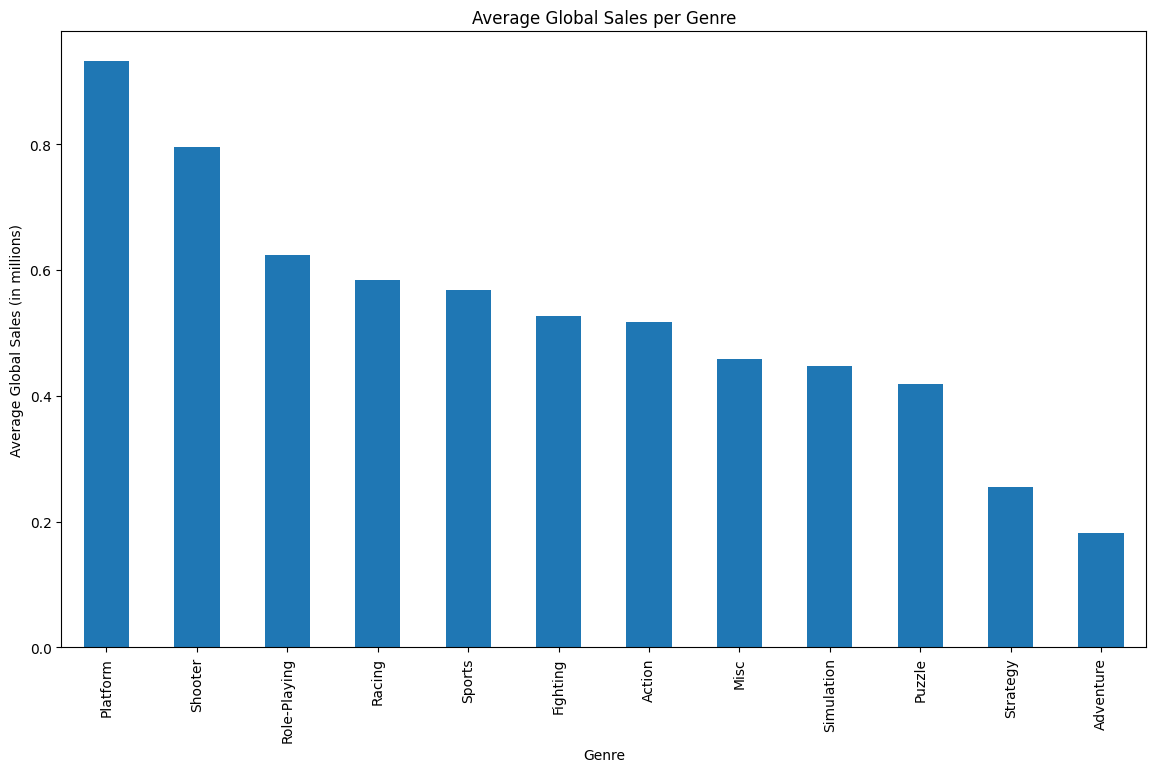

In [113]:
# Plot average sales per genre
plt.figure(figsize=(14, 8))
average_sales_genre.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Global Sales per Genre')
plt.ylabel('Average Global Sales (in millions)')
plt.xlabel('Genre')
plt.show()


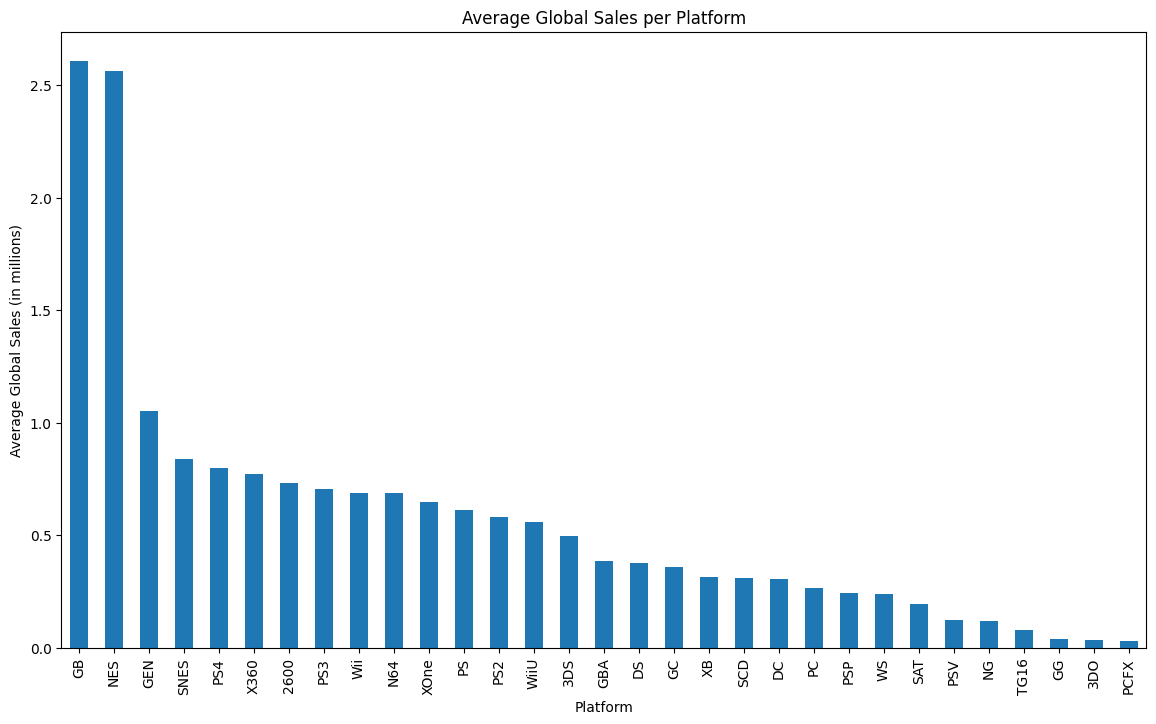

In [114]:
# Plot average sales per platform
plt.figure(figsize=(14, 8))
average_sales_platform.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Global Sales per Platform')
plt.ylabel('Average Global Sales (in millions)')
plt.xlabel('Platform')
plt.show()

### 7-Market Share:

- What is the market share of different platforms, genres, and publishers?

In [107]:
# Calculate total sales for platforms, genres, and publishers
platform_sales = sales_df.groupby('Platform')['Global_Sales'].sum()
genre_sales = sales_df.groupby('Genre')['Global_Sales'].sum()
publisher_sales = sales_df.groupby('Publisher')['Global_Sales'].sum()

# Calculate total global sales
total_global_sales = sales_df['Global_Sales'].sum()

# Calculate market share
platform_market_share = (platform_sales / total_global_sales) * 100
genre_market_share = (genre_sales / total_global_sales) * 100
publisher_market_share = (publisher_sales / total_global_sales) * 100

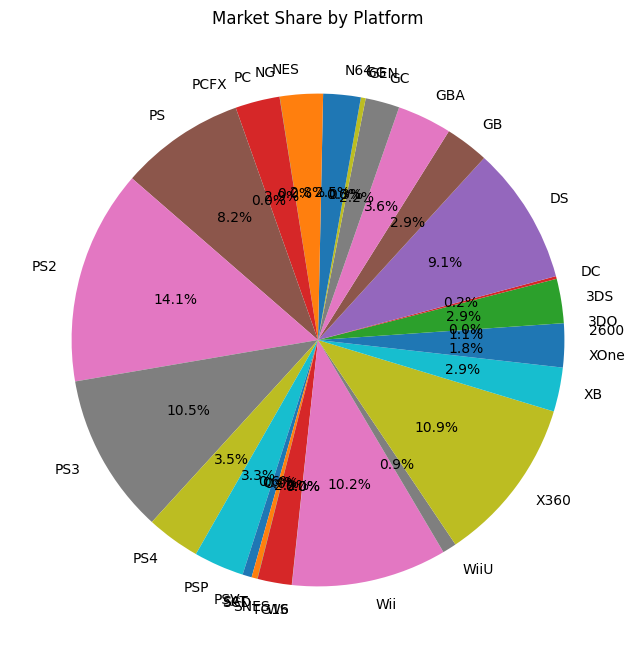

In [108]:
# Plot market share for platforms
plt.figure(figsize=(12, 8))
platform_market_share.plot(kind='pie', autopct='%1.1f%%')
plt.title('Market Share by Platform')
plt.ylabel('')
plt.show()

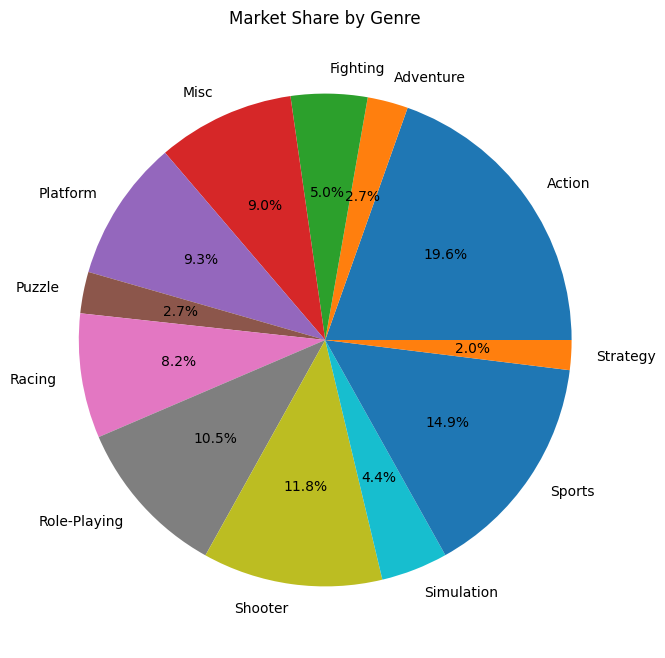

In [109]:
# Plot market share for genres
plt.figure(figsize=(12, 8))
genre_market_share.plot(kind='pie', autopct='%1.1f%%')
plt.title('Market Share by Genre')
plt.ylabel('')
plt.show()

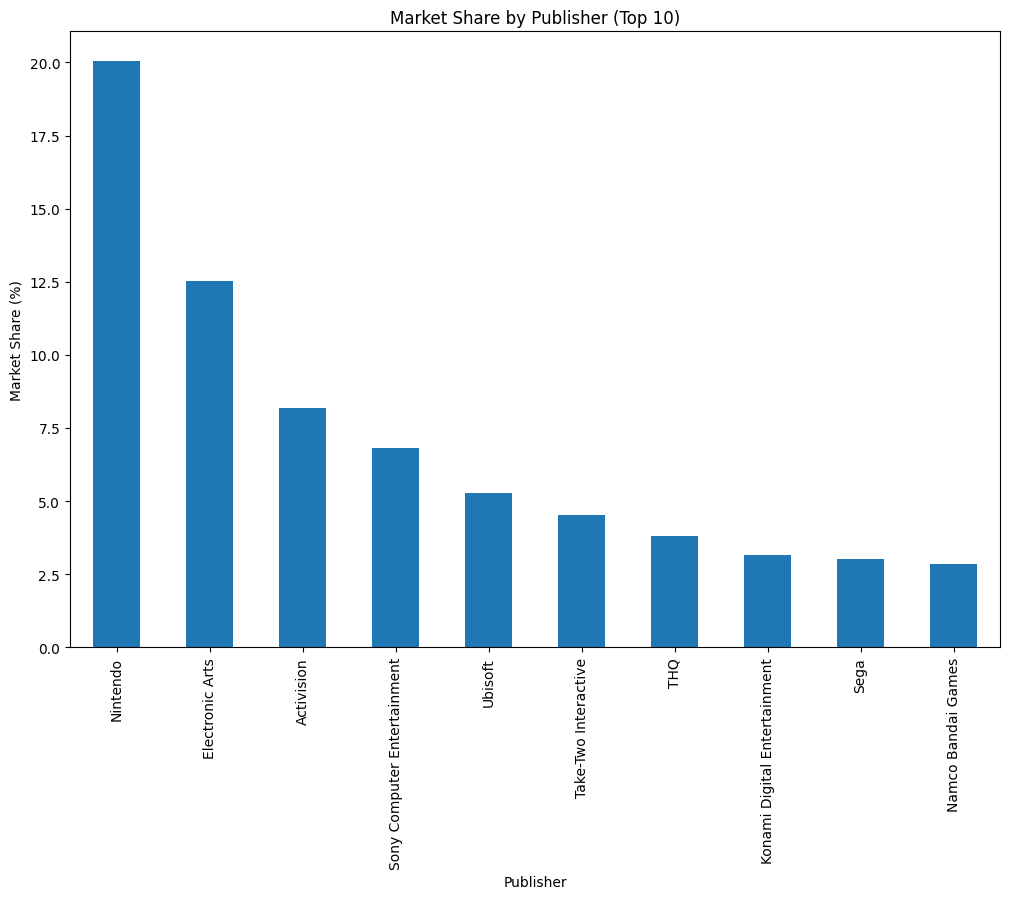

In [110]:
# Plot market share for publishers
plt.figure(figsize=(12, 8))
top_publishers = publisher_market_share.sort_values(ascending=False).head(10) # Display top 10 publishers
top_publishers.plot(kind='bar')
plt.title('Market Share by Publisher (Top 10)')
plt.ylabel('Market Share (%)')
plt.xlabel('Publisher')
plt.show()

## Insights and Conclusions

- How do sales trends differ between regions (e.g., America vs. Europe vs. Japan)?

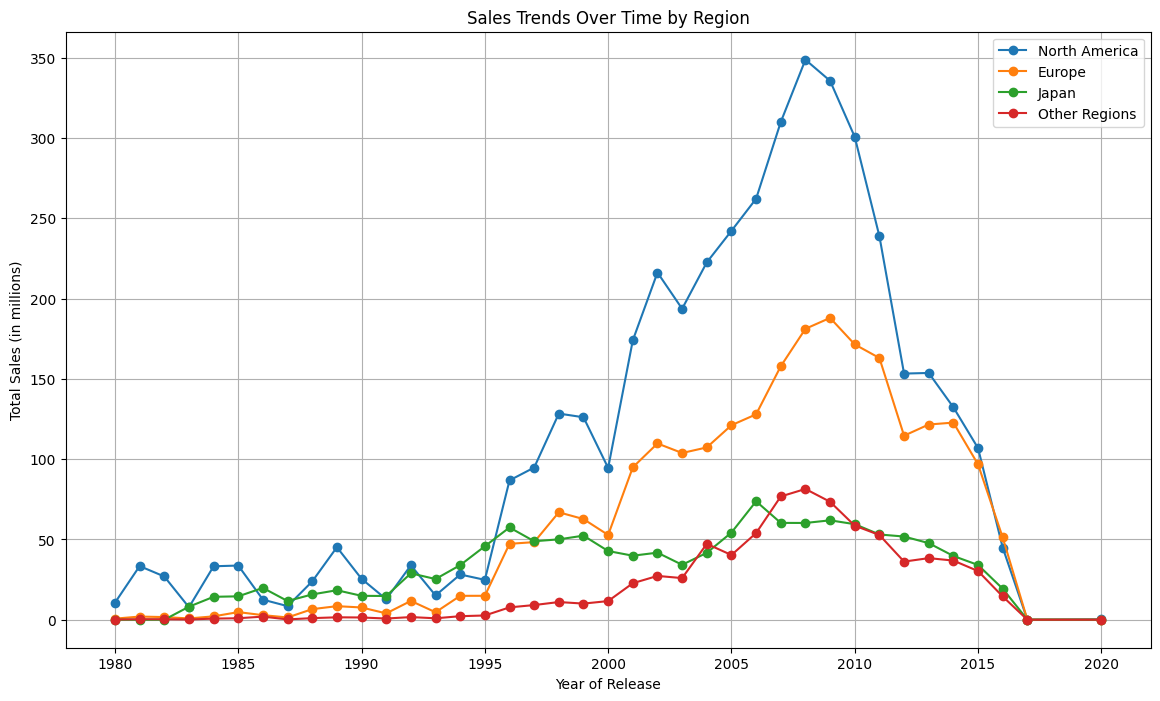

In [116]:
# Convert the Year_of_Release to numeric 
sales_df['Year_of_Release'] = pd.to_numeric(sales_df['Year_of_Release'], errors='coerce')

# Drop rows with NaN values in the Year_of_Release column
df = sales_df.dropna(subset=['Year_of_Release'])

# Aggregate sales data by year for each region
sales_by_year = sales_df.groupby('Year_of_Release').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Plot sales trends for each region
plt.figure(figsize=(14, 8))
plt.plot(sales_by_year.index, sales_by_year['NA_Sales'], label='North America', marker='o')
plt.plot(sales_by_year.index, sales_by_year['EU_Sales'], label='Europe', marker='o')
plt.plot(sales_by_year.index, sales_by_year['JP_Sales'], label='Japan', marker='o')
plt.plot(sales_by_year.index, sales_by_year['Other_Sales'], label='Other Regions', marker='o')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.title('Sales Trends Over Time by Region')
plt.legend()
plt.grid(True)
plt.show()

- Are there genres or platforms that are particularly popular in one region but not in others?

In [117]:
# Aggregate sales data by genre and platform for each region
genre_sales_by_region = sales_df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_sales_by_region = sales_df.groupby('Platform').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Calculate total global sales by genre and platform
genre_sales_by_region['Global_Sales'] = genre_sales_by_region.sum(axis=1)
platform_sales_by_region['Global_Sales'] = platform_sales_by_region.sum(axis=1)

# Calculate the ratio of regional sales to global sales for each genre and platform
for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    genre_sales_by_region[f'{region}_Ratio'] = genre_sales_by_region[region] / genre_sales_by_region['Global_Sales']
    platform_sales_by_region[f'{region}_Ratio'] = platform_sales_by_region[region] / platform_sales_by_region['Global_Sales']


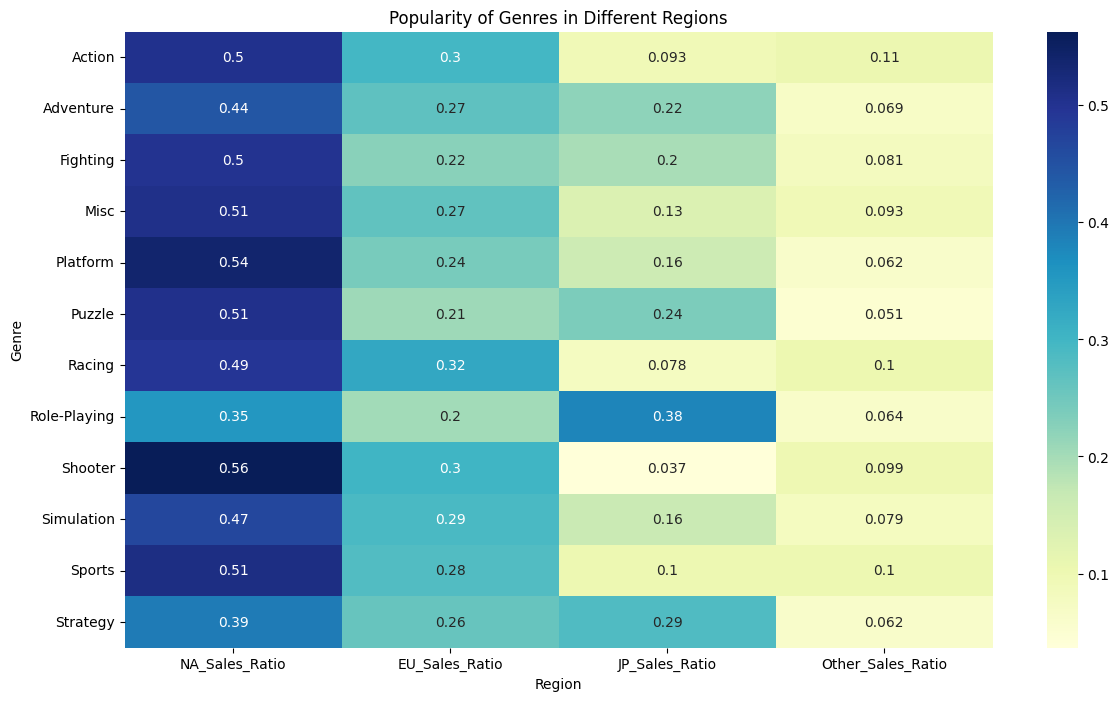

In [118]:
import seaborn as sns
# Visualize the popularity of genres in different regions
plt.figure(figsize=(14, 8))
sns.heatmap(genre_sales_by_region[[f'{region}_Ratio' for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]],
            annot=True, cmap='YlGnBu')
plt.title('Popularity of Genres in Different Regions')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.show()

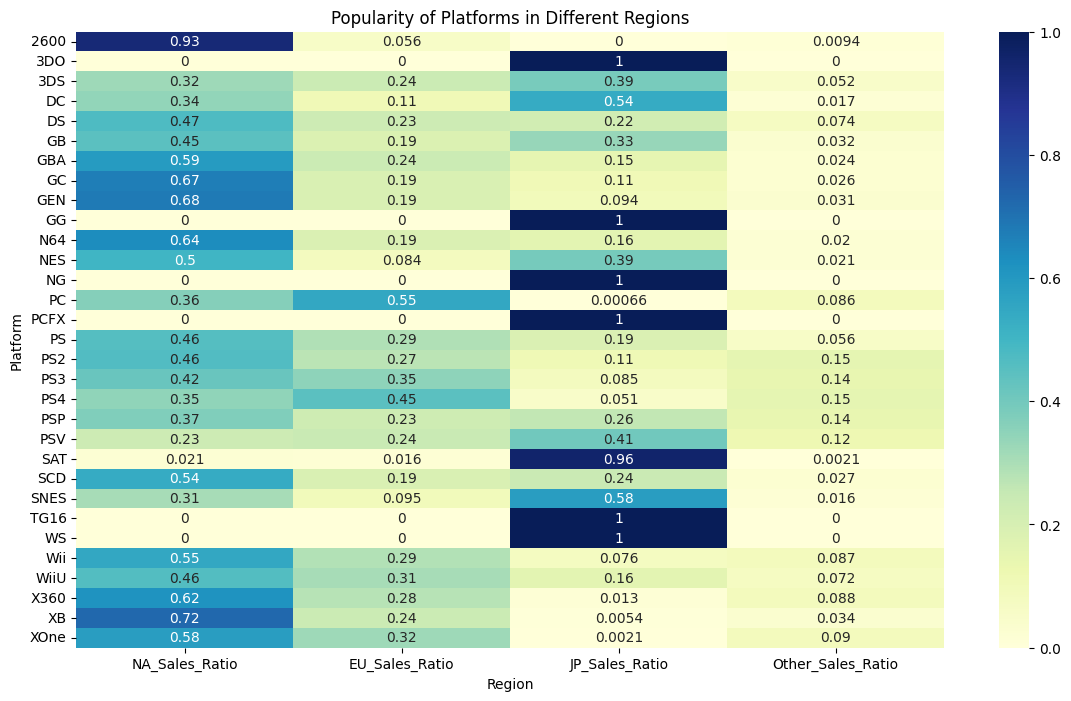

In [119]:
import seaborn as sns 
# Visualize the popularity of platforms in different regions
plt.figure(figsize=(14, 8))
sns.heatmap(platform_sales_by_region[[f'{region}_Ratio' for region in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]],
            annot=True, cmap='YlGnBu')
plt.title('Popularity of Platforms in Different Regions')
plt.xlabel('Region')
plt.ylabel('Platform')
plt.show()

- How do sales from top publishers vary by region?

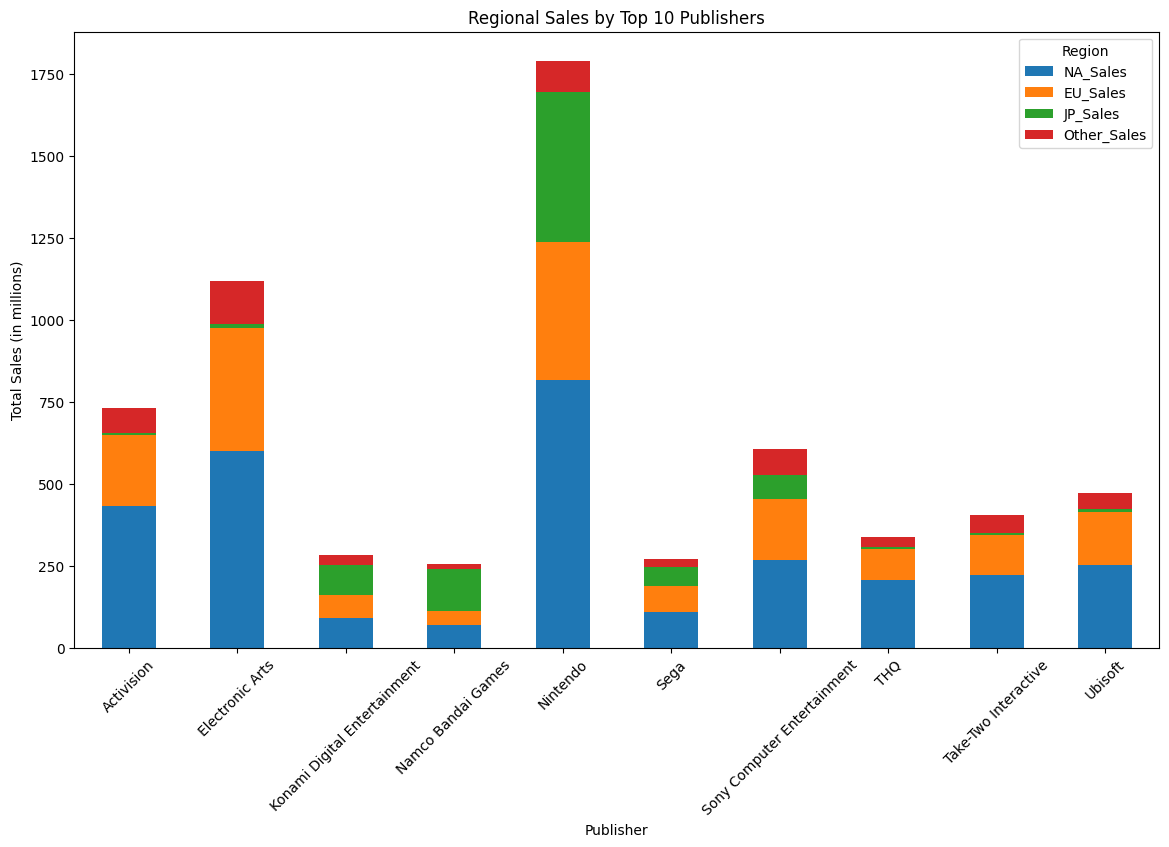

In [120]:
# Aggregate total global sales by publisher
publisher_sales = sales_df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Identify top 10 publishers based on global sales
top_publishers = publisher_sales.head(10).index

# Filter the dataset to include only the top publishers
top_publishers_df = sales_df[sales_df['Publisher'].isin(top_publishers)]

# Aggregate sales data by publisher and region
regional_sales_by_publisher = top_publishers_df.groupby('Publisher').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Plot sales by region for top publishers
regional_sales_by_publisher.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Regional Sales by Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()

- How do sales differ across platforms in different regions?

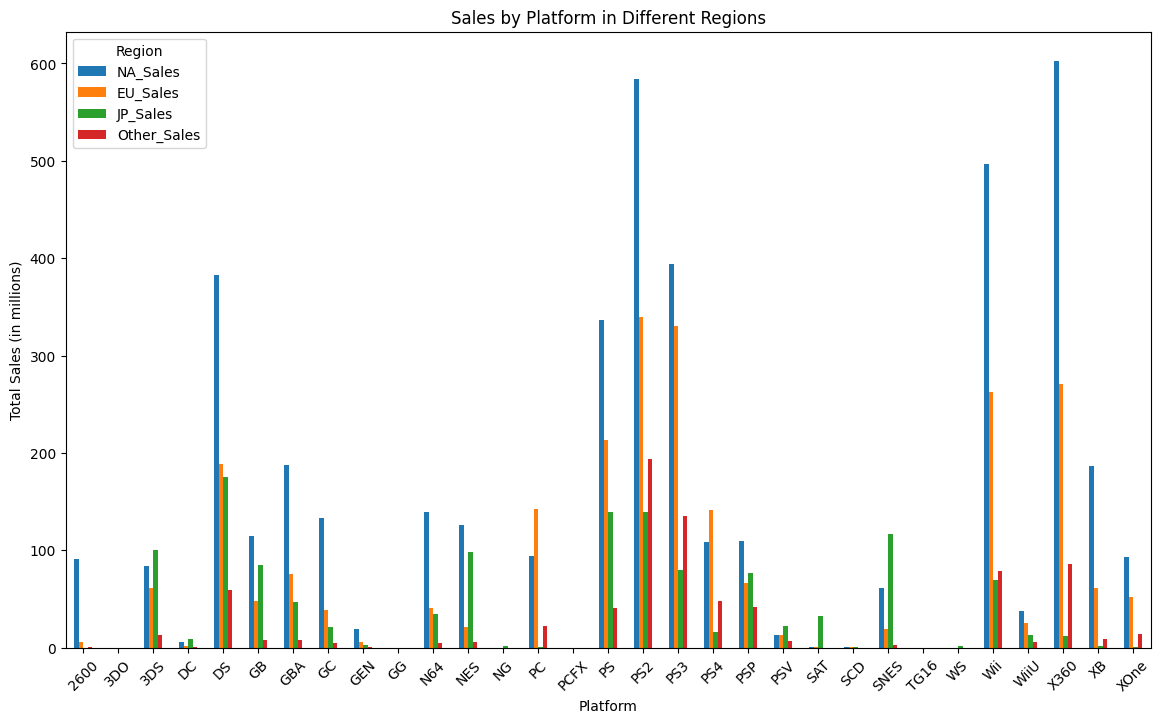

In [121]:
# Aggregate sales data by platform and region
platform_sales_by_region = sales_df.groupby('Platform').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Plot sales by region for each platform
platform_sales_by_region.plot(kind='bar', figsize=(14, 8))
plt.title('Sales by Platform in Different Regions')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.show()

- How do the top-selling games differ by region (e.g., top games in America vs. Japan)?

In [122]:
# Define the number of top games to select
top_n = 10

# Identify top-selling games in North America
top_na_games = sales_df[['Name', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False).head(top_n)
top_na_games['Region'] = 'North America'

# Identify top-selling games in Europe
top_eu_games = sales_df[['Name', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False).head(top_n)
top_eu_games['Region'] = 'Europe'

# Identify top-selling games in Japan
top_jp_games = sales_df[['Name', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False).head(top_n)
top_jp_games['Region'] = 'Japan'

# Identify top-selling games in Other regions
top_other_games = sales_df[['Name', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False).head(top_n)
top_other_games['Region'] = 'Other Regions'

# Combine the top games dataframes
top_games = pd.concat([top_na_games.rename(columns={'NA_Sales': 'Sales'}),
                       top_eu_games.rename(columns={'EU_Sales': 'Sales'}),
                       top_jp_games.rename(columns={'JP_Sales': 'Sales'}),
                       top_other_games.rename(columns={'Other_Sales': 'Sales'})])

# Display the top games by region
print(top_games)


                                             Name  Sales         Region
0                                      Wii Sports  41.36  North America
1                               Super Mario Bros.  29.08  North America
9                                       Duck Hunt  26.93  North America
5                                          Tetris  23.20  North America
2                                  Mario Kart Wii  15.68  North America
3                               Wii Sports Resort  15.61  North America
14                             Kinect Adventures!  15.00  North America
8                       New Super Mario Bros. Wii  14.44  North America
7                                        Wii Play  13.96  North America
18                              Super Mario World  12.78  North America
0                                      Wii Sports  28.96         Europe
2                                  Mario Kart Wii  12.76         Europe
10                                     Nintendogs  10.95        

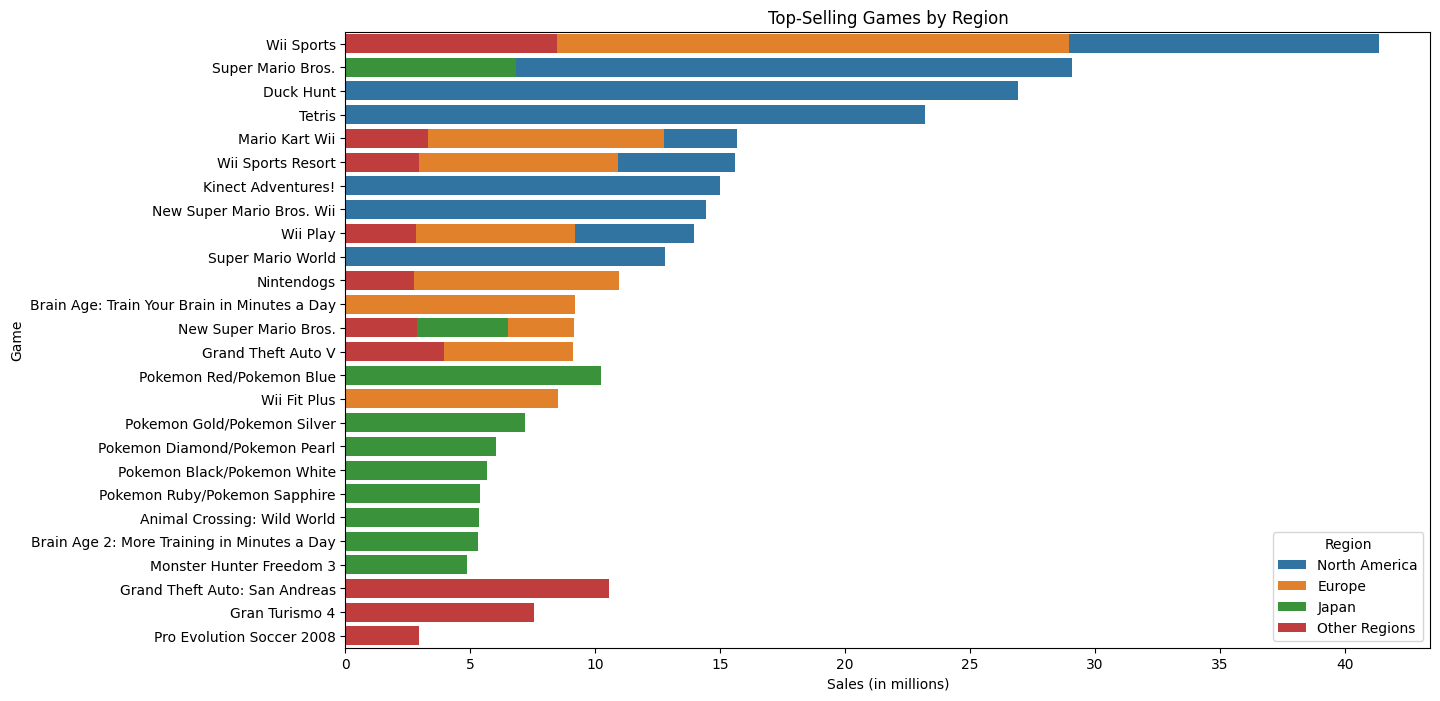

In [123]:
# Optionally, visualize the top games by region
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='Name', hue='Region', data=top_games, dodge=False)
plt.title('Top-Selling Games by Region')
plt.xlabel('Sales (in millions)')
plt.ylabel('Game')
plt.legend(title='Region')
plt.show()